Лучшее решение:  4.155250709555346


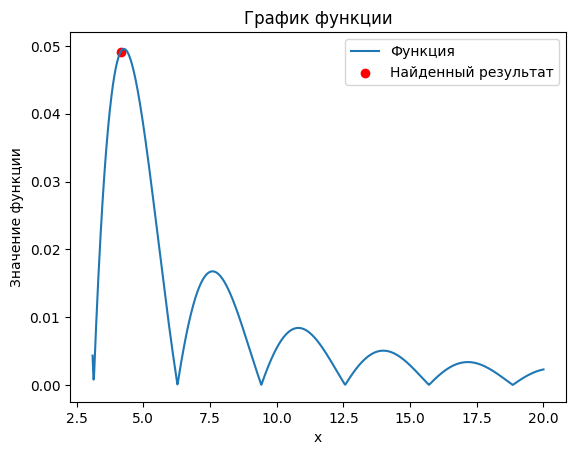

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

#
# Исходные данные
#
# для кодирования чисел используем 2 в 15 степени бит (2^15)
a = 3.1
c = 20
p = 10    # Мощность популяции (количество особей)

# Фитнес функция
def fitnes(x):
    return abs( np.sin(x) / x**2 )

# Сумма значений фитнес функции 
def sum_fitnes_value(population):
    total_fitnes = 0
    for element in population:
        total_fitnes += element[2]
    return total_fitnes

# Максимальное значение фитнес функции
def max_fitnes(population):
    temp = list()
    for element in population:
        temp.append(element[2])
    return max(temp)

# Функция заполняет долю значений фитнес функции от общей суммы
#
# Параметры:
#    population - Список (list) - популяция элементов
#    sum_fitnes - Число - сумма всех значений фитнес функций (по всем элементам популяции)
def fate_of_value(population, sum_fitnes):
    for element in population:
        fate = (element[2] * 100) / sum_fitnes 
        fate = np.round(fate, 2)
        element[3] = fate
        
# Функция преобразует двоичный список элемента популяции в десятичное число
# с учетом кодирования чисел
#
# Параметры:
#    element - Список (list) - двоичное представление элемента популяции
#
# Возвращаемое значение:
#    Число - десятичное представление элемента популяции
def to_decimal(element):
    # преобразуем двоичное число в 10-е
    number = int(''.join(element), 2)

    # декодируем число
    y = a + (number * ( (c - a) / (math.pow(2, 15) - 1) ) )
    return y

# Функция создаёт начальную популяцию элементов
#
# Параметры:
#    count - Число - количество элементов популяции (мощность популяции)
#
# Возвращаемое значение:
#    Список (list) - начальная популяция
def initial_population(count):
    # Таблица 'result' содержит элементы:
    # 1) Элемент популяции
    # 2) десятичное представление элемента
    # 3) значение фитнес функции
    # 4) доля значения от суммы всех значений фитнес функции (заполняется позже)
    result = list()

    for i in range(count):
        # сгенерируем двоичный элемент начальной популяции
        element = list()
        for k in range(15):
            element.append( str(random.randint(0, 1)) )  

        # получим десятичное представление сгенерированного элемента
        decimal_val = to_decimal(element)
        fitnes_val  = fitnes(decimal_val)
        
        result.append( [element, decimal_val, fitnes_val, 0] )
    return result

def best_value(population):
    temp = list()
    for element in population:
        temp.append( element[1] )

    return max(temp)

# Функция реализует генетический оператор селекции
# основанный на турнирной рулетке.
#
# Параметры:
#    population - Список (list) - популяция элементов
#
# Возвращаемое значение:
#    Список (list) - новая популяция элементов, отобранная для оператора "Кроссинговера" 
def operator_selection(population):
    roulette = list()
    new_population = list()
    sum_fitnes = 0
    sum_fitnes_prev = 0
    
    # Заполним турнирную рулетку
    # Каждому элементу популяции присваивается диапазон значений
    for element in population:
        ind_elem = population.index(element)
        sum_fitnes += element[3]  
        roulette.append( [ind_elem, [sum_fitnes_prev, sum_fitnes]] )
        sum_fitnes_prev = sum_fitnes
    
    # Будем генерировать случайные числа от 0 до 100
    # и сравнивать их с диапазоном чисел рулетки.
    # Элемент, в диапазон которого попадёт случайное число, выбирается в новую популяцию
    while len(new_population) < p:
        random_number = np.round( random.random() * 100, 2)  

        # Проверим входит ли случайное число в диапазон значений присвоенных элементу популяции
        for ind in roulette:
            diapason = ind[1]
            if random_number >= diapason[0] and random_number < diapason[1]:
                # Добавим элемент в новую популяцию
                element = population[ind[0]]
                new_population.append(element)
                break

    return new_population

# Функция реализует генетический оператор Кроссинговера (размножения)
#
# Параметры:
#    population - Список (list) - популяция элементов
#
# Возвращаемое значение:
#    Список (list) - новая популяция элементов, отобранная для оператора "Кроссинговера" 
def operator_crossingover(population):
    new_population = list()
    
    # Случайным образом определим пары элементов для размножения.
    temp = list()
    for i in range(len(population)):
        temp.append(i)

    while len(temp) != 0:
        # Выберем элементы для кросинговера
        ind1 = random.choice(temp) 
        temp.remove(ind1)
        element1 = population[ind1][0]
        
        ind2 = random.choice(temp)  
        temp.remove(ind2)
        element2 = population[ind2][0]

        # Случайным образом определим точку кроссинговера
        point = random.randint(0, len(element1)-1)

        # Выполним кроссинговер
        new_element1 = element1[0:point] + element2[point:]
        new_element2 = element2[0:point] + element1[point:]

        # получим десятичное представление сгенерированного элемента
        decimal_val_1 = to_decimal(new_element1)
        fitnes_val_1  = fitnes(decimal_val_1)

        decimal_val_2 = to_decimal(new_element2)
        fitnes_val_2  = fitnes(decimal_val_2)
        
        new_population.append( [new_element1, decimal_val_1, fitnes_val_1, 0] )
        new_population.append( [new_element2, decimal_val_2, fitnes_val_2, 0] )

    return new_population

# Функция реализует генетический оператор мутации
#
# Параметры:
#    population - Список (list) - популяция элементов
#
# Возвращаемое значение:
#    Список (list) - новая популяция элементов, отобранная для оператора "Кроссинговера" 
def operator_mutate(population):
    # Выбираем случайный элемент для мутации
    ind = random.randint(0, len(population)-1)
    element = population[ind][0]

    # Определяем точку мутации
    point = random.randint(0, len(element)-1)

    # Выполним инверсию значения в точке мутации
    if element[point] == '1':
        element[point] = '0'
    else:
        element[point] = '1'

    # получим десятичное представление элемента после мутации
    decimal_val = to_decimal(element)
    fitnes_val  = fitnes(decimal_val)
    
    new_element = [element, decimal_val, fitnes_val, 0] 
    population[ind] = new_element

    return population

#
# Основной цикл
#

# Создадим новую популяцию
population = initial_population(10)
avg = 0
avg_prev = 0
best = 0

for i in range(100):
#while True:
    sum_fitnes    = sum_fitnes_value(population)
    avg           = sum_fitnes / p
    max_fitnes_falue = max_fitnes(population)
    fate_of_value(population, sum_fitnes)

    # Выполним селекцию особей
    population_1 = operator_selection(population)
    population_2 = operator_crossingover(population_1)
    population_3 = operator_mutate(population_2)

    population = population_3

    best = best_value(population)
    
    # условие выхода из цикла
    #if (avg - avg_prev) < 0.00001:
    #    break
    
    avg_prev      = avg 

print("Лучшее решение: ", best)

# Построение графика
x = np.linspace(a, c, 1000)
y = fitnes(x)
plt.plot(x, y, label='Функция')
plt.scatter(best, fitnes(best), color='red', label='Найденный результат')    
plt.legend()
plt.xlabel('x')
plt.ylabel('Значение функции')
plt.title('График функции')
plt.show()
    

